# Basic maps with cartopy

In [1]:
# import our usual things
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# make plots a little bigger
plt.rcParams['figure.dpi'] = 100 # 300

In [3]:
states_files = cartopy.io.shapereader.natural_earth(resolution='110m', category='cultural', 
                                                   name='admin_1_states_provinces_lakes_shp')

In [4]:
# read the shape file's contents
reader = cartopy.io.shapereader.Reader(states_files)

# line by line reading of data
data_line = reader.records()
data = next(data_line)
data

<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x116d95f98>, {'scalerank': 2, 'featurecla': 'Admin-1 scale rank', 'adm1_code': 'USA-3514', 'diss_me': 3514, 'adm1_cod_1': 'USA-3514', 'iso_3166_2': 'US-MN', 'wikipedia': 'http://en.wikipedia.org/wiki/Minnesota', 'sr_sov_a3': 'US1', 'sr_adm0_a3': 'USA', 'iso_a2': 'US', 'adm0_sr': 1, 'admin0_lab': 2, 'name': 'Minnesota', 'name_alt': 'MN|Minn.', 'name_local': '', 'type': 'State', 'type_en': 'State', 'code_local': 'US32', 'code_hasc': 'US.MN', 'note': '', 'hasc_maybe': '', 'region': 'Midwest', 'region_cod': '', 'region_big': 'West North Central', 'big_code': '', 'provnum_ne': 0, 'gadm_level': 1, 'check_me': 10, 'scaleran_1': 2, 'datarank': 1, 'abbrev': 'Minn.', 'postal': 'MN', 'area_sqkm': 0.0, 'sameascity': -99, 'labelrank': 0, 'featurec_1': 'Admin-1 scale rank', 'admin': 'United States of America', 'name_len': 9, 'mapcolor9': 1, 'mapcolor13': 1}, <fields>>

In [6]:
# grab individual bits of info
regions = lambda data: data.attributes['diss_me']
states_by_region = sorted(reader.records(),key=regions)[:5]
states_by_region

[<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x116dc7be0>, {'scalerank': 2, 'featurecla': 'Admin-1 scale rank', 'adm1_code': 'USA-3513', 'diss_me': 3513, 'adm1_cod_1': 'USA-3513', 'iso_3166_2': 'US-MA', 'wikipedia': 'http://en.wikipedia.org/wiki/Massachusetts', 'sr_sov_a3': 'US1', 'sr_adm0_a3': 'USA', 'iso_a2': 'US', 'adm0_sr': 6, 'admin0_lab': 2, 'name': 'Massachusetts', 'name_alt': 'Commonwealth of Massachusetts|MA|Mass.', 'name_local': '', 'type': 'State', 'type_en': 'State', 'code_local': 'US25', 'code_hasc': 'US.MA', 'note': '', 'hasc_maybe': '', 'region': 'Northeast', 'region_cod': '', 'region_big': 'New England', 'big_code': '', 'provnum_ne': 0, 'gadm_level': 1, 'check_me': 0, 'scaleran_1': 2, 'datarank': 1, 'abbrev': 'Mass.', 'postal': 'MA', 'area_sqkm': 0.0, 'sameascity': -99, 'labelrank': 0, 'featurec_1': 'Admin-1 scale rank', 'admin': 'United States of America', 'name_len': 13, 'mapcolor9': 1, 'mapcolor13': 1}, <fields>>,
 <Record: <shapely.geometry.multip

Text(0.5, 1.0, 'Equirectangular')

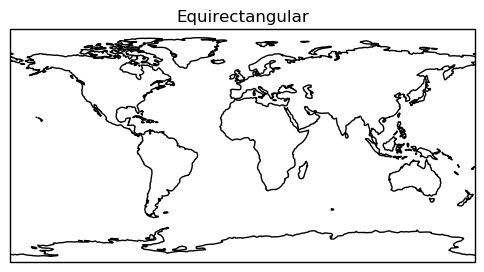

In [10]:
# lets move on from (badly spelled) academic pulling of data
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.coastlines()
plt.title('Equirectangular')

Text(0.5, 1.0, 'Mollweide')

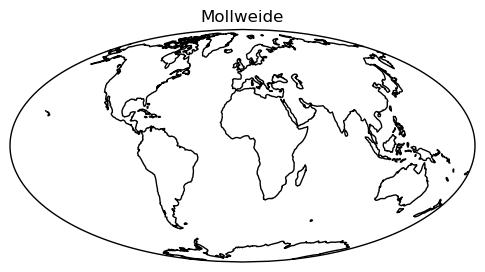

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection=cartopy.crs.Mollweide())
ax.coastlines()
plt.title("Mollweide")

In [12]:
# lets draw some lines between points
champaign_lat, champaign_lon = 40.1164, -88.2434
ant_lat, ant_lon = -18.8792, 47.5079

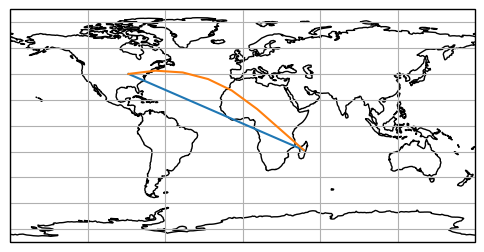

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_global()
ax.plot([champaign_lon, ant_lon],[champaign_lat,ant_lat], 
       transform=cartopy.crs.PlateCarree())
# shortest distance
ax.plot([champaign_lon, ant_lon],[champaign_lat,ant_lat], 
       transform=cartopy.crs.Geodetic())


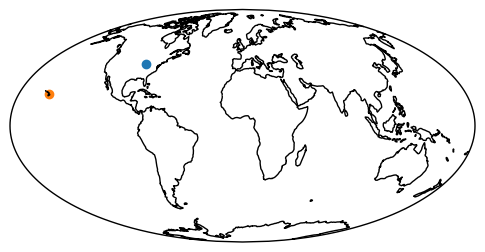

In [26]:
# I can also plot points
fig =plt.figure()
ax=fig.add_subplot(111,projection=cartopy.crs.Mollweide())
champaign = 40.1164, -88.2434
oahu = 19.8968, -155.582
ax.scatter(champaign[1],champaign[0], 
          transform = cartopy.crs.PlateCarree())
ax.scatter(oahu[1],oahu[0], transform=cartopy.crs.PlateCarree())
ax.set_global()
ax.coastlines()

In [31]:
locations = pd.read_csv('/Users/jillnaiman1/Downloads/location.txt', header=None, delimiter='\t',
                       names=['longitude', 'latitude', 'empty1', 'empty2'])

In [32]:
del locations['empty1'], locations['empty2']

In [33]:
locations

,longitude,latitude
0,-98.683,27.065
1,-98.102,26.938
2,-98.068,26.463
3,-117.110,32.889
4,-107.790,32.532
5,-98.916,32.608
6,-98.079,32.573
7,-97.410,32.557
8,-96.530,32.475
9,-95.756,32.597


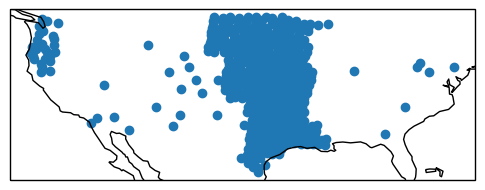

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111,projection=cartopy.crs.LambertCylindrical())
ax.scatter(locations['longitude'], locations['latitude'], transform=cartopy.crs.PlateCarree())
ax.coastlines()
#ax.set_global()

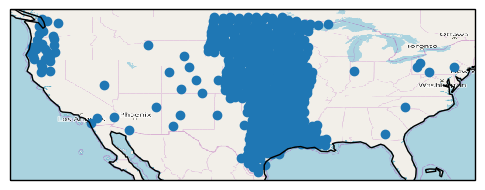

In [39]:
import cartopy.io.img_tiles
imagery = cartopy.io.img_tiles.OSM()

fig = plt.figure()
ax = fig.add_subplot(111,projection=cartopy.crs.LambertCylindrical())
ax.scatter(locations['longitude'], locations['latitude'], transform=cartopy.crs.PlateCarree())
ax.coastlines()
ax.add_image(imagery, 4)

In [40]:
seismic = pd.read_csv('/Users/jillnaiman1/Downloads/data_tohoku_norm_transpose.csv',
           header = None)

In [41]:
seismic.shape, locations.shape

((14401, 438), (438, 2))

In [42]:
14401/(60*60)

4.000277777777778

In [43]:
import ipywidgets
@ipywidgets.interact(station=(0,437))
def plot(station=0):
    plt.plot(seismic[station])
    plt.xlabel("Time in sec")
    plt.ylabel("Normalized Displacement")
    plt.ylim(-1,1)

interactive(children=(IntSlider(value=0, description='station', max=437), Output()), _dom_classes=('widget-int…

In [44]:
nstations = 300
ntimes = 1440

import numpy as np
stationsIndex = np.random.choice(range(locations.shape[0]-1), nstations, replace=False)
timesIndex = np.random.choice(range(seismic.shape[0]-1), ntimes, replace=False)

stationsIndex.sort()
timesIndex.sort()


In [46]:
locations2 = locations.loc[stationsIndex]
seismic2 = seismic.loc[timesIndex, stationsIndex]

In [47]:
seismic2.shape, locations2.shape

((1440, 300), (300, 2))

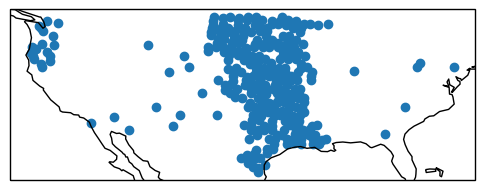

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.LambertCylindrical())
ax.scatter(locations2['longitude'], locations2['latitude'], transform=cartopy.crs.PlateCarree())
ax.coastlines()

In [50]:
seismic2

,0,1,2,3,4,5,7,8,11,12,...,425,426,427,428,429,430,432,434,435,436
0,-2.551700e-04,-6.777600e-05,4.060000e-04,-0.000275,7.007600e-05,4.146800e-05,-4.027600e-05,1.524400e-04,-0.000041,2.662400e-04,...,-4.613000e-05,1.294600e-04,-1.420500e-04,-1.564100e-04,2.492400e-05,0.000064,2.953400e-05,5.129600e-05,1.564800e-04,2.822500e-04
1,-2.380300e-04,-8.505400e-05,4.110400e-04,-0.000293,8.511800e-05,5.799300e-05,-4.152400e-05,1.410500e-04,-0.000045,2.182900e-04,...,-6.196800e-05,1.525600e-04,-9.967600e-05,-1.179300e-04,1.266900e-04,0.000029,9.264900e-05,1.601500e-05,5.606200e-05,2.799200e-04
3,-2.028800e-04,-1.166100e-04,4.109400e-04,-0.000321,1.112200e-04,8.691600e-05,-4.199800e-05,1.159800e-04,-0.000050,1.231000e-04,...,-8.968300e-05,1.924800e-04,-1.755600e-05,-4.309800e-05,3.159100e-04,-0.000037,2.081100e-04,-5.225800e-05,-1.349100e-04,2.686400e-04
8,-1.188400e-04,-1.607200e-04,3.675500e-04,-0.000334,1.463200e-04,1.295800e-04,-3.637900e-05,5.632600e-05,-0.000042,-5.887800e-05,...,-1.245600e-04,2.459200e-04,1.282700e-04,9.604800e-05,6.245200e-04,-0.000154,3.929000e-04,-1.679200e-04,-4.674600e-04,2.198500e-04
14,-6.036400e-05,-1.548700e-04,2.916800e-04,-0.000284,1.360200e-04,1.306400e-04,-2.566200e-05,1.184000e-05,-0.000022,-1.354300e-04,...,-1.208500e-04,2.353400e-04,1.733500e-04,1.511200e-04,6.744600e-04,-0.000188,4.188800e-04,-1.930700e-04,-5.583900e-04,1.588100e-04
18,-4.042700e-05,-1.293200e-04,2.465700e-04,-0.000242,1.156500e-04,1.156800e-04,-2.121900e-05,-7.668000e-07,-0.000019,-1.294200e-04,...,-1.047600e-04,2.029900e-04,1.581600e-04,1.394500e-04,5.957600e-04,-0.000170,3.680600e-04,-1.696400e-04,-5.042700e-04,1.286600e-04
28,-2.364400e-05,-7.979600e-05,1.523900e-04,-0.000149,7.112900e-05,6.737700e-05,-1.296400e-05,1.629300e-06,-0.000017,-6.775100e-05,...,-6.051100e-05,1.333000e-04,9.595400e-05,8.302900e-05,3.609500e-04,-0.000105,2.229000e-04,-9.088400e-05,-3.101200e-04,8.179800e-05
39,-6.339500e-06,-5.354500e-05,7.574100e-05,-0.000085,3.940700e-05,4.742600e-05,-8.141900e-06,5.219100e-07,-0.000008,-4.450800e-05,...,-3.640800e-05,7.726500e-05,6.562300e-05,5.130700e-05,2.210400e-04,-0.000062,1.361100e-04,-6.004100e-05,-1.920900e-04,4.569600e-05
56,1.502800e-05,-1.197900e-05,3.832900e-08,-0.000008,1.023300e-05,1.517100e-05,-5.030200e-06,-5.677300e-06,0.000012,-3.401200e-05,...,-9.991900e-06,1.867000e-05,2.713800e-05,2.964800e-05,6.438400e-05,-0.000026,4.532400e-05,-2.556700e-05,-6.718800e-05,-1.255900e-06
66,1.735400e-05,1.248100e-05,-2.344200e-05,0.000018,-1.743500e-06,-1.804800e-06,-2.977300e-07,-8.502900e-06,0.000012,-2.904500e-05,...,3.595100e-06,-7.616600e-06,7.995600e-06,1.429400e-05,3.456600e-07,-0.000013,2.116000e-07,-7.562600e-06,-9.790100e-06,-1.909600e-05


In [51]:
@ipywidgets.interact(station=(0,nstations-1))
def plot(station=0):
    plt.plot(seismic2.iloc[:,station])
    plt.xlabel("Time in sec")
    plt.ylabel("Normalized Displacement")
    plt.ylim(-1,1)

interactive(children=(IntSlider(value=0, description='station', max=299), Output()), _dom_classes=('widget-int…

In [53]:
import bqplot
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# marks
lines = bqplot.Lines(x=seismic2.index.values, y=seismic2.loc[:,0], 
                    scales={'x':x_sc, 'y':y_sc})

# axes
x_ax = bqplot.Axis(scale=x_sc)
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical')

# combine into figure
fig = bqplot.Figure(marks=[lines], axes=[x_ax,y_ax])

# lets link a slider widget
slider = ipywidgets.IntSlider(min=0,max=nstations-1)

# create a linking function
def update_slider(event):
    lines.y = seismic2.iloc[:,event['new']]
    
slider.observe(update_slider,'value')

ipywidgets.VBox([slider, fig])

In [56]:
# combining sensor data as a function of time with our map data (locations)
@ipywidgets.interact(station=(0,nstations-1,1), t=(0,ntimes,1))
def plot(station=0, t=0):
    fig = plt.figure()
    # map figure
    ax=fig.add_subplot(211, projection=cartopy.crs.LambertCylindrical())
    colors=seismic2.iloc[t]
    ax.scatter(locations2['longitude'], locations2['latitude'], 
              transform=cartopy.crs.PlateCarree(), c=colors)
    ax.coastlines()
    
    # plot of a particular sensosr as a function of time
    ax = fig.add_subplot(212)
    ax.plot(seismic2.index.values, seismic2.iloc[:,station])
    ax.set_ylim(-1,1)

interactive(children=(IntSlider(value=0, description='station', max=299), IntSlider(value=0, description='t', …

# Maps with bqplot

In [57]:
map_mark = bqplot.Map(scales={'projection':bqplot.AlbersUSA()})
fig = bqplot.Figure(marks=[map_mark],title='Basic')
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=…

In [65]:
# lets do state map instead
sc_geo = bqplot.AlbersUSA() # scales, USA
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# lets add a tooltip that shows us something about the
#  underlying data
def_tt = bqplot.Tooltip(fields=['id','name'])


# generate marks
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, 
                       tooltip=def_tt)
states_map.interactions ={'hover':'tooltip', 'click':'select'}

from states_utils import get_ids_and_names
ids, state_names = get_ids_and_names(states_map)

def get_data_value(change):
    if change['owner'].selected is not None:
        for i, s in enumerate(change['owner'].selected):
            print(state_names[s==ids], s)
states_map.observe(get_data_value,'selected')

fig = bqplot.Figure(marks=[states_map], title='US States Map', 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, layout=Layout(min_width='125px'), marks=[Map…

['Iowa'] 19
['Iowa'] 19
['Texas'] 48
['Texas'] 48
['Florida'] 12


In [66]:
# lets link some export data to our map
comm = pd.read_csv('/Users/jillnaiman1/Downloads/total_export.csv')

In [67]:
comm

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,574.6,673.2,530.0,719.5,724.4,771.5,695.6,839.7,"1,050.4","1,040.7","1,131.7","1,405.0","1,469.6","1,587.3","1,510.1","1,199.1","1,207.6","1,271.9"
1,Alaska,6.3,6.9,6.5,8.3,8.4,9.8,9.5,10.2,10.6,10.3,11.5,12.9,13.4,14.5,16.9,16.3,16.5,17.4
2,Arizona,485.9,467.1,511.8,552.6,632.1,663.5,706.0,843.8,"1,014.4",851.0,"1,070.0","1,514.8","1,335.5","1,435.6","1,334.5","1,391.5","1,453.8","1,682.6"
3,Arkansas,"1,306.3","1,346.9","1,327.7","1,801.0","1,914.8","1,937.8","2,050.7","2,606.1","3,514.1","2,864.4","3,190.4","3,506.2","4,010.1","4,023.4","3,625.6","3,142.9","3,007.0","3,182.8"
4,California,"6,852.6","7,088.0","7,210.3","7,848.4","8,703.1","9,679.4","10,351.5","11,561.8","14,014.8","13,462.3","15,353.3","18,195.9","20,182.9","22,781.1","23,931.4","22,897.1","21,860.2","23,050.5"
5,Colorado,892.6,918.0,918.6,872.5,739.6,830.2,965.9,"1,285.9","1,474.5","1,232.3","1,510.4","1,860.3","1,722.3","1,640.7","1,796.2","1,590.9","1,541.5","1,701.8"
6,Connecticut,132.1,128.6,131.0,130.2,134.7,152.8,160.4,193.4,193.6,187.5,213.4,238.3,249.1,252.5,259.6,263.8,249.1,248.4
7,Delaware,130.7,148.3,122.2,120.7,136.9,141.0,137.8,187.2,239.8,231.0,241.5,269.3,311.1,308.2,322.9,258.6,257.9,267.8
8,Florida,"1,883.2","1,857.4","1,797.3","1,882.0","1,877.0","2,094.8","2,275.8","2,608.0","2,803.7","2,564.9","2,962.6","3,334.7","3,645.6","3,659.1","3,648.2","3,433.7","3,317.3","3,225.2"
9,Georgia,"1,301.5","1,321.3","1,099.2","1,330.3","1,473.3","1,477.4","1,511.4","1,908.0","2,284.0","2,102.3","2,584.0","3,214.4","3,246.9","3,598.6","2,995.0","2,819.2","2,881.7","2,803.8"


In [68]:
comm.loc[comm['State']=='Alabama'].values

array([['Alabama', '574.6', '673.2', '530.0', '719.5', '724.4', '771.5',
        '695.6', '839.7', '1,050.4', '1,040.7', '1,131.7', '1,405.0',
        '1,469.6', '1,587.3', '1,510.1', '1,199.1', '1,207.6', '1,271.9']],
      dtype=object)

In [69]:
years = list(comm.columns.values)
years = np.array(years[1:])
years = years.astype('int')
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [73]:
# lets do state map instead
sc_geo = bqplot.AlbersUSA() # scales, USA
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# lets add a tooltip that shows us something about the
#  underlying data
def_tt = bqplot.Tooltip(fields=['id','name'])


# generate marks for map
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, 
                       tooltip=def_tt)
states_map.interactions ={'hover':'tooltip', 'click':'select'}

from states_utils import get_ids_and_names
ids, state_names = get_ids_and_names(states_map)

# line plot for exports
x_scl = bqplot.LinearScale()
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Year', scale=x_scl)
ax_ycl = bqplot.Axis(label='Total Export from State NA', scale=y_scl, orientation='vertical', side='left')
lines = bqplot.Lines(x=years, y=np.zeros(len(years)), scales={'x':x_scl, 'y':y_scl})
fig_lines = bqplot.Figure(marks=[lines],axes=[ax_ycl, ax_xcl])

def get_data_value(change):
    exports = np.zeros(len(years))
    snames =''
    if change['owner'].selected is not None:
        for i, s in enumerate(change['owner'].selected):
            sn = state_names[s == ids][0]
            snames += sn +', '
            exports_in = comm.loc[comm['State']==sn].values[0][1:]
            # I have commas in my strings
            exports_in = np.array([export_in[i].replace(',','') for i in range(length(export_in))])
            export = np.apd(exports,exports_in.astype('float64'))
            lines.y=exports
            ax_ycl.label='Total export from ' + snnames
            
            #print(state_names[s==ids], s)
states_map.observe(get_data_value,'selected')

fig = bqplot.Figure(marks=[states_map], title='US States Map', 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})

ipywidgets.HBox([fig,fig_lines])

NameError: name 'length' is not defined

NameError: name 'length' is not defined